# La Serena Data Science School 2017
# Loan Outcomes

Students: Daniela Grandon, Patricio Fibla, Tomas Muller, Ryan Keegan, Humna Awan

Group Name: __CaThruster__
    
Mentor: Pavlos Protopapas

---


<img src="Screen Shot 2017-08-27 at 9.49.01 AM.png">

## Problem Statement

Multiclass classification problem for predicting loan status from a rich dataset. The problem
can be reduced to a classification problem to build a loan approval pre-check system for
potential customers.

### Other Issues

The data available only covers a population which were already granted a loan, there is no data for the rejected population. In addition, there is missing data and many different features (~80) which we have to deal with.

## Data

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
%matplotlib inline

import os
currentDir= os.getcwd()
os.chdir(currentDir+'/../')


file = r'data/loan.csv'
loans = pd.read_csv(file)

sample = loans.loc[0:100]
sample

/Users/Humna/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualising Data

It is always good to visualise the data to see what we are dealing with. Some time it is easy to identify correlations this way.

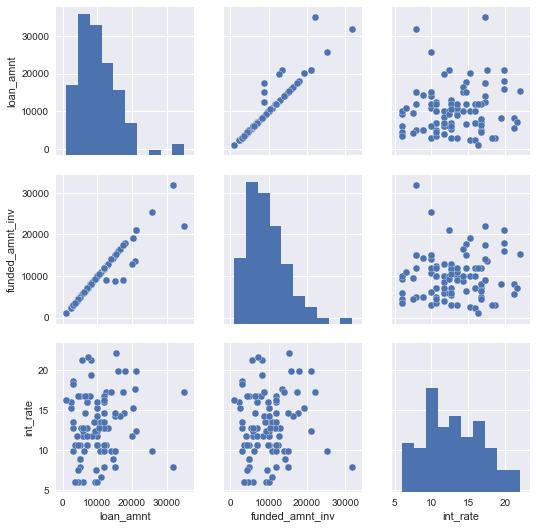

In [2]:
sns.pairplot(sample[['loan_amnt','funded_amnt_inv','int_rate']])

In [3]:
from sklearn.ensemble import RandomForestClassifier
from getRiskCol import getRiskCol

file = r'data/cleanerData_necessaryNumerical+imputed_updatedRisk+lessCols.csv'
loans = pd.read_csv(file)

sample = loans.loc[:10000]
labels = sample['risk']

## Categorical Values

We are going to turn categorical values into integers and for that we are going to use the One Hot Encoder or equivalent to it, Pandas get_dummies, in order to not add __false information__

In [4]:
from sklearn import preprocessing

sample = pd.get_dummies(sample)
sample

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,addr_state,dti,delinq_2yrs,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,risk_Default,risk_Maybe,risk_NotDefault
0,5000,5000,4975.000000,10.65,162.87,24000.00,810,4,27.65,0,...,0,0,0,0,0,0,0,0,0,1
1,2500,2500,2500.000000,15.27,59.83,30000.00,296,11,1.00,0,...,0,0,0,0,0,0,0,1,0,0
2,2400,2400,2400.000000,15.96,84.33,12252.00,572,15,8.72,0,...,0,0,0,0,1,0,0,0,0,1
3,10000,10000,10000.000000,13.49,339.31,49200.00,856,5,20.00,0,...,0,0,1,0,0,0,0,0,0,1
4,3000,3000,3000.000000,12.69,67.79,80000.00,909,38,17.94,0,...,0,0,1,0,0,0,0,0,1,0
5,5000,5000,5000.000000,7.90,156.46,36000.00,803,4,11.20,0,...,0,0,0,0,0,0,1,0,0,1
6,7000,7000,7000.000000,15.96,170.08,47004.00,267,28,23.51,0,...,0,0,0,0,0,0,0,0,1,0
7,3000,3000,3000.000000,18.64,109.43,48000.00,839,5,5.35,0,...,0,0,0,0,0,0,0,0,0,1
8,5600,5600,5600.000000,21.28,152.39,40000.00,897,5,5.55,0,...,0,0,0,0,1,0,0,1,0,0
9,5375,5375,5350.000000,12.69,121.45,15000.00,729,44,18.08,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
#sample.to_csv('Numerical_Data.csv')

## Scaling Data

In order to analize the data more properly we need to scale the data. We are going to use __Standar Scaler__ to do that.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(sample)

scaled_sample = scaler.transform(sample)

## Dimensionality Reduction

We added some columns in order to deal with the categorical data, but the dimension of the data matrix increased by alot. Luckily we learned about __P__rincipal __C__omponent __A__nalisys, so now we can reduce the dimensionality of the data. However we still need to check which of the original features are most importat, so we need to take into account the __mean__ and __variance__ of each one.

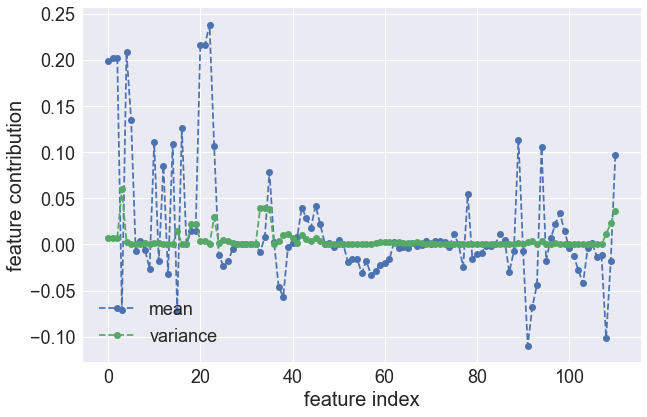

In [7]:
from sklearn.decomposition import PCA

n_comp = 2
pca = PCA(n_components=n_comp, svd_solver='auto')
fit = pca.fit(scaled_sample)
pca_data = pca.transform(scaled_sample)
pca_inv_data = pca.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.legend(loc='lower left', fontsize=18)

In [8]:
i = np.identity(scaled_sample.shape[1])  # identity matrix

coef = pca.transform(i)
pd.DataFrame(coef[80:-1], columns=['PC-1', 'PC-2'], index=sample.columns[80:-1])

,PC-1,PC-2
emp_length_3 years,-0.009796,-0.010131
emp_length_4 years,-0.007613,-0.009882
emp_length_5 years,-0.004258,0.001669
emp_length_6 years,-0.002077,-0.000316
emp_length_7 years,0.003786,-0.001992
emp_length_8 years,0.008249,0.015016
emp_length_9 years,0.000825,0.007788
emp_length_< 1 year,-0.027229,-0.033004
emp_length_n/a,-0.019103,0.004669
home_ownership_MORTGAGE,0.069957,0.157101


In [9]:
mask = np.where(np.abs(pca_inv_data.mean(axis=0))> 0.05)
sample.columns[mask]

add_columns = ('risk_Maybe', 'home_ownership_OWN', 'verification_status_Source Verified')
delete_columns = ('grade_A', 'grade_D', 'emp_length_10+ years', 'risk_Default', 'risk_NotDefault', 'risk_Maybe')

reduced_cols = []

for column in sample.columns[mask]:
    if column != delete_columns[0] and column != delete_columns[1] and column != delete_columns[2] and \
        column != delete_columns[3] and column != delete_columns[4] and column != delete_columns[5]:  
        
        reduced_cols.append(column)
        
for n in range(len(add_columns)):
    reduced_cols.append(add_columns[n])        


In [10]:
reduced_sample = sample[reduced_cols]
del reduced_sample['risk_Maybe'] # a bug?
reduced_sample

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,earliest_cr_line,open_acc,revol_bal,revol_util,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,home_ownership_MORTGAGE,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,home_ownership_OWN,verification_status_Source Verified
0,5000,5000,4975.000000,10.65,162.87,24000.00,391.0,3,13648.0,83.70,...,5861.071414,5831.78,5000.00,861.07,0,1,0,1,0,0
1,2500,2500,2500.000000,15.27,59.83,30000.00,220.0,3,1687.0,9.40,...,1008.710000,1008.71,456.46,435.17,0,1,0,0,0,1
2,2400,2400,2400.000000,15.96,84.33,12252.00,189.0,2,2956.0,98.50,...,3003.653644,3003.65,2400.00,603.65,0,1,1,0,0,0
3,10000,10000,10000.000000,13.49,339.31,49200.00,258.0,10,5598.0,21.00,...,12226.302212,12226.30,10000.00,2209.33,0,1,0,0,0,1
4,3000,3000,3000.000000,12.69,67.79,80000.00,259.0,15,27783.0,53.90,...,3242.170000,3242.17,2233.10,1009.07,0,1,0,0,0,1
5,5000,5000,5000.000000,7.90,156.46,36000.00,153.0,9,7963.0,28.30,...,5631.377753,5631.38,5000.00,631.38,0,1,0,0,0,1
6,7000,7000,7000.000000,15.96,170.08,47004.00,145.0,7,17726.0,85.60,...,8136.840000,8136.84,5110.85,3025.99,0,1,1,0,0,0
7,3000,3000,3000.000000,18.64,109.43,48000.00,127.0,4,8221.0,87.50,...,3938.144334,3938.14,3000.00,938.14,0,1,0,0,0,1
8,5600,5600,5600.000000,21.28,152.39,40000.00,160.0,11,5210.0,32.60,...,646.020000,646.02,162.02,294.94,0,0,0,0,1,1
9,5375,5375,5350.000000,12.69,121.45,15000.00,155.0,2,9279.0,36.50,...,1476.190000,1469.34,673.48,533.42,0,1,0,1,0,0


# Testing Classifiers

Now that we have a reduced data sample with the most important features, we can start training different classifiers and compare them

In [11]:
import itertools
from sklearn import metrics

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(reduced_sample, labels, test_size=0.4, random_state=0)

pred= {}
score_test= {}

## Random Forest

Train MSE Mean Score: 0.9985

Mean CV Score:  0.969003879864
Standard Deviation: 0.00768204085241

Test MSE Mean Score: 0.978005498625

Normalized confusion matrix


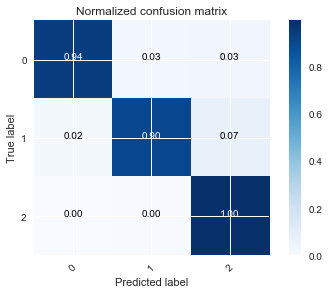

In [13]:
clf = RandomForestClassifier(n_estimators=10, criterion='gini', 
                             max_depth=None, bootstrap=True, oob_score=False, n_jobs=2)

clf.fit(X_train, y_train)
clf.score(X_train, y_train)

print "Train MSE Mean Score: %s\n"%clf.score(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print "Mean CV Score: ", np.mean(cv_scores)
print "Standard Deviation: %s\n"% np.std(cv_scores)

key= 'RF'
pred[key] = clf.predict(X_test)
score_test[key]= clf.score(X_test, y_test) 
expected = y_test

print "Test MSE Mean Score: %s\n"%score_test[key]

plot_confusion_matrix(metrics.confusion_matrix(expected, pred[key]), classes=range(3), normalize=True,
                      title='Normalized confusion matrix')

#### Full Sample Result

<img src="RF_CM.png">

## Support Vector Machine

Train MSE Mean Score: 1.0

Mean CV Score:  0.750666736227
Standard Deviation: 0.000243004007596

Test MSE Mean Score: 0.745813546613

Normalized confusion matrix


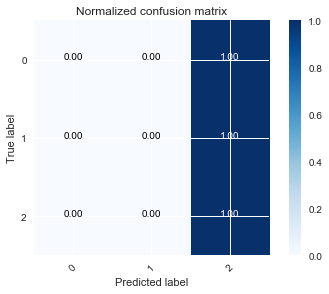

In [14]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')

clf.fit(X_train, y_train)
clf.score(X_train, y_train)

print "Train MSE Mean Score: %s\n"%clf.score(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print "Mean CV Score: ", np.mean(cv_scores)
print "Standard Deviation: %s\n"% np.std(cv_scores)

key= 'SVM'
pred[key] = clf.predict(X_test)
score_test[key]= clf.score(X_test, y_test) 
expected = y_test

print "Test MSE Mean Score: %s\n"%score_test[key]

plot_confusion_matrix(metrics.confusion_matrix(expected, pred[key]), classes=range(3), normalize=True,
                      title='Normalized confusion matrix')

#### Full sample didn't run .. 

## K Nearest Neighbor

Train MSE Mean Score: 0.831

Mean CV Score:  0.820832589236
Standard Deviation: 0.00246776339501

Test MSE Mean Score: 0.824043989003

Normalized confusion matrix


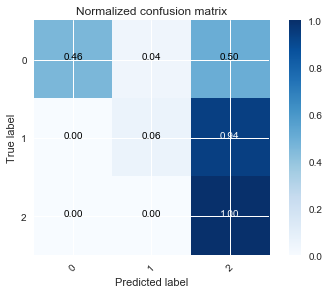

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=30)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

print "Train MSE Mean Score: %s\n"%clf.score(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print "Mean CV Score: ", np.mean(cv_scores)
print "Standard Deviation: %s\n"% np.std(cv_scores)

key= 'KNN'
pred[key] = clf.predict(X_test)
score_test[key]= clf.score(X_test, y_test) 
expected = y_test

print "Test MSE Mean Score: %s\n"%score_test[key]

plot_confusion_matrix(metrics.confusion_matrix(expected, pred[key]), classes=range(3), normalize=True,
                      title='Normalized confusion matrix')

#### Full Sample Result

<img src="KNN_CM.png">

## Loan Outcome

In [16]:
def loanApprovalStatus(riskArr, int_rate, funded_amount, datalabel): 
    # assume daily compounding. 60 months term.
    # defaulting: rejected.
    # risky & nonrisky: all accepted - high risk with the former.
    
    riskArr= np.array(riskArr)
    int_rate= np.array(int_rate)
    funded_amount= np.array(funded_amount)
    
    tot= len(riskArr)
    profit= np.zeros(tot)
    
    int_rate= int_rate/100.
    
    loanTerm= np.zeros(tot)+60.
    ##
    default= np.where(riskArr=='Default')[0]
    profit[default]= -700

    # assume monthly compounding
    n= 365.

    # calculate profit
    notdefault= np.where(riskArr=='NotDefault')[0]
    nYears= loanTerm[notdefault]/12.
    profit[notdefault]= funded_amount[notdefault]*(1.+((int_rate[notdefault])/n))**(n*nYears)-funded_amount[notdefault]
   
    risky= np.where(riskArr=='Maybe')[0]
    nYears= (loanTerm[risky]+6.)/12.   # assume risky would take 6months extra?
    profit[risky]= funded_amount[risky]*(1+((int_rate[risky])/n))**(n*nYears)-funded_amount[risky]
    
    # profit percent
    profitPercent= profit/funded_amount
    
    # loan approval? accept everything thats not 100% defaulting.
    loanApproval= np.zeros(tot)+1
    loanApproval[default]= 0.
    
    # plot histogram: profit %
    bins= 20
    alpha= 0.5
    fontsize= 14
    histtype= 'bar'
    plt.hist(profitPercent[risky], label= 'maybe', alpha= alpha, bins= bins, histtype=histtype)
    plt.hist(profitPercent[notdefault], label= 'not default', alpha= alpha, bins= bins, histtype=histtype)
    plt.xlabel('profit (% funded)', fontsize= fontsize)
    plt.title('%s: Approval rate (%%): %s'%(datalabel, 100.*(1.-float(len(default))/tot)), fontsize= fontsize)
    plt.legend(fontsize= fontsize)
    plt.gcf().set_size_inches(12,6)
    
    ax= plt.axes()
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    
    plt.show()

#### Sub-sample run

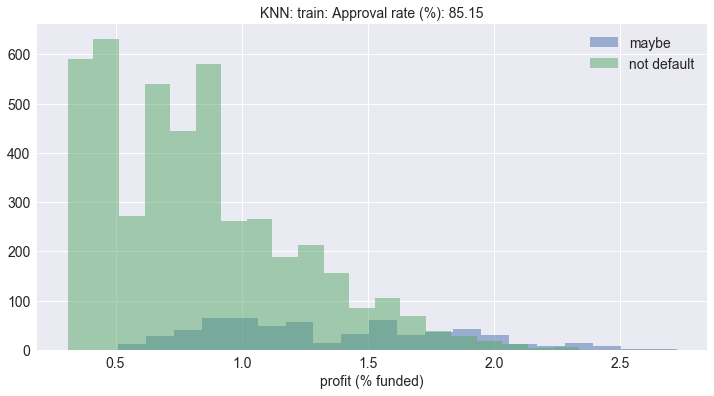

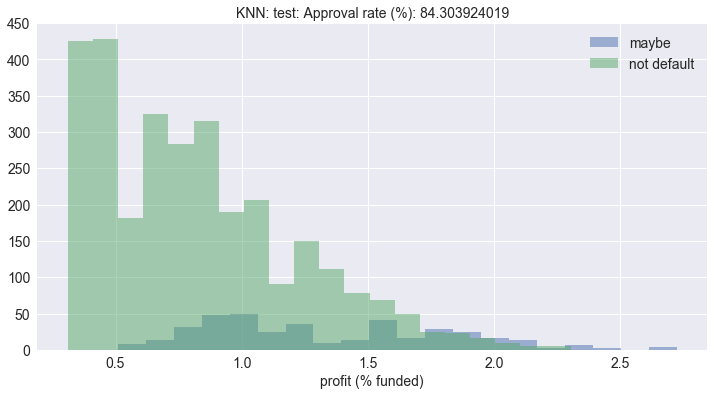

******** ******** ******** ******** ******** ******** ********


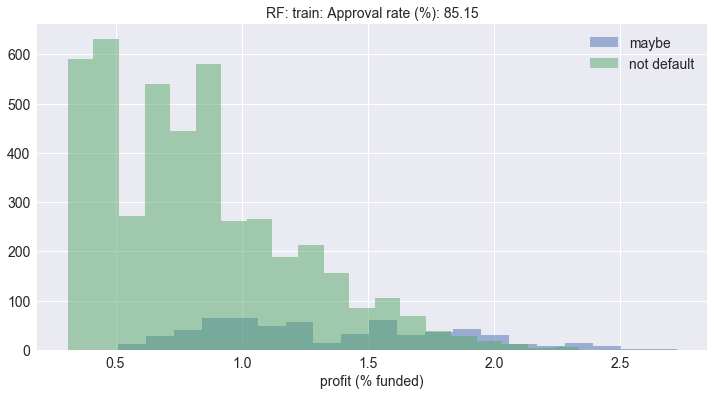

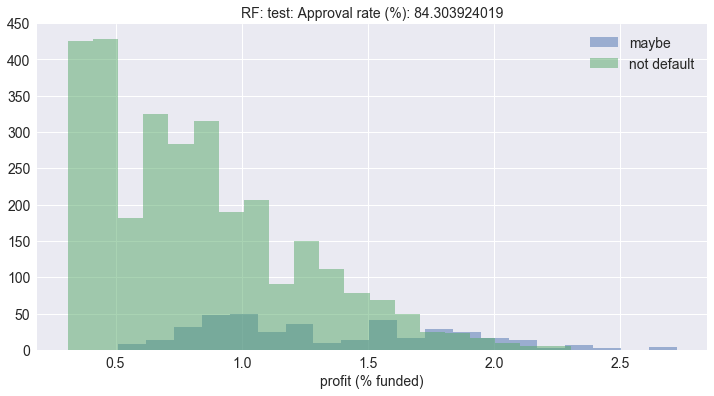

******** ******** ******** ******** ******** ******** ********


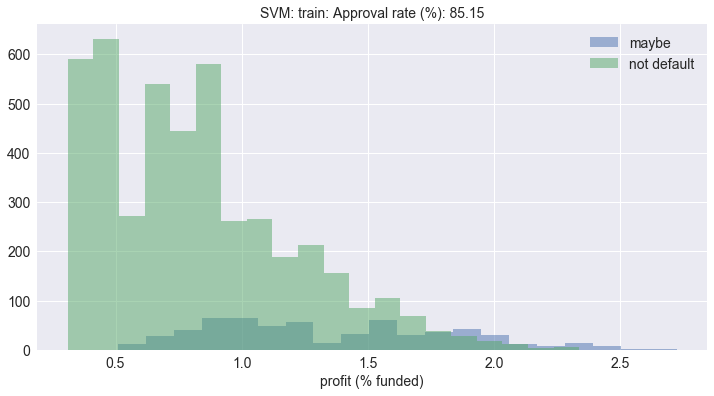

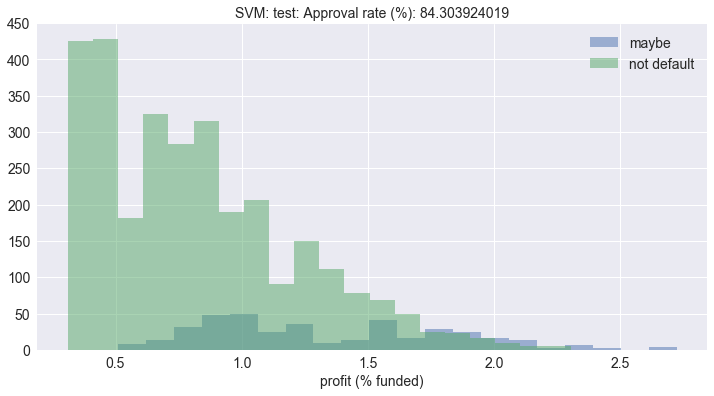

******** ******** ******** ******** ******** ******** ********


In [17]:
for alg in pred.keys():
    ## train
    data_all= X_train
    riskArr= y_train
    label= '%s: train'%alg
    
    loanApproval= loanApprovalStatus(riskArr= riskArr, 
                                     int_rate= data_all['int_rate'], 
                                     funded_amount= data_all['funded_amnt'],
                                    datalabel= label)
    # test
    data_all= X_test
    riskArr= y_test
    label= '%s: test'%alg
    
    loanApproval= loanApprovalStatus(riskArr= riskArr, 
                                     int_rate= data_all['int_rate'], 
                                     funded_amount= data_all['funded_amnt'],
                                    datalabel= label)

    print '******** ******** ******** ******** ******** ******** ********'

## Summary

### Goal: Predict Loan Outcomes

#### Roadblocks:
- Missing Data v1: rejected applications stats missing
    - Couldn't help.
    - Used secondary info to answer our question:
        1) Predict Risk
        2) Account for profits
        3) Decide on loan outcomes
- Missing Data v2: features from approved loan application missing
    - Removal of features that were missing for 90+% data
    - Imputation for the rest
- String classification for various features + class
    - Enumeration, e.g. for zipcodes
    - One-hot encoding for the rest
 
#### Main Techniques
- Data clean up; imputation
- PCA for feature extraction
- Classifiers: RF, SVM, KNN
    
#### Need to do
- Get SVM to work on full sample.
- More thorough cross-validation.
- More involved feature selection?
- Think more about how to evaluate the loan outcomes.
